# Solving MNIST Handwritten Digit Recognition with PyTorch

## Dataset

The MNIST dataset comprises 60,000 grayscale images of handwritten digits (0–9), each sized 28x28 pixels.

## Objective

Train a model that can predict labels of given images.

## Approach

- Divide the dataset into two sets
  - Training dataset: 50000 samples
  - Testing dataset: 10000 samples
- Use the training dataset to learn a model
- Evaluate the model with testing dataset

# 1. Verify Package Installation

#### 1.1 Verify python version

In [18]:
!python --version

Python 3.10.18


#### 1.2 Verify the required packages are available.

In [23]:
from importlib.metadata import version

packages = [
    "torch",
    "torchvision",
    "matplotlib"
]

for package in packages:
    print(f"{package} version:", version(package))

torch version: 2.7.1
torchvision version: 0.22.1
matplotlib version: 3.10.0


# 2. Import required packages

In [24]:
# The core PyTorch library for building and training neural networks.
import torch

# Provides utilities for image processing and access to standard datasets like MNIST.
from torchvision.datasets import MNIST

# transforms are used convert images into tensors aka matrix aka n-d vectors
import torchvision.transforms as transforms

# Used for plotting and visualizing data.
import matplotlib.pyplot as plt

# util function
from torch.utils.data import random_split

# util function to read data
from torch.utils.data import DataLoader

import torch.nn.functional as F

# 3. Download Images Dataset

- MNIT function will download the dataset from internet and store in local drive at path `/data`
- This function returns the entire dataset as list on objects in our case it is list of `PIL.Image.Image`

In [25]:
dataset = MNIST(root = 'data/', download = True)
print("Dataset Size: ", len(dataset))
print("Dataset Objects Type:", dataset[0])

Dataset Size:  60000
Dataset Objects Type: (<PIL.Image.Image image mode=L size=28x28 at 0x14FE3B910>, 5)


# 4. Visualize Images From Dataset

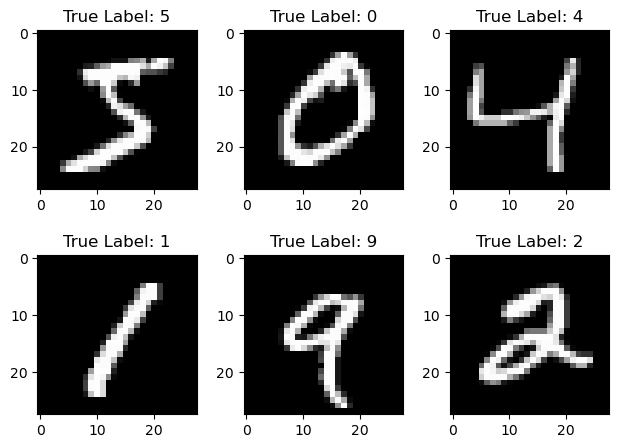

In [16]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.tight_layout()
  plt.imshow(dataset[i][0], cmap='gray', interpolation='none')
  plt.title("True Label: {}".format(dataset[i][1]))

# 5. Loading Dataset as Tensors

Using `torchvision.datasets.MNIST` to load the MNIST handwritten digit dataset.

- `root='data/'`: directory to store or load the dataset
- `train=True`: Loads the **training set** (60,000 images). Used to train the model.
- `train=False`: Loads the **test set** (10,000 images). Used to evaluate model performance after training.
- `transform=transforms.ToTensor()`: Converts each image to a PyTorch tensor and normalizes pixel values to the range [0.0, 1.0]

This prepares the dataset for training neural networks.

In [17]:
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [26]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [27]:
print(image_tensor[0])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

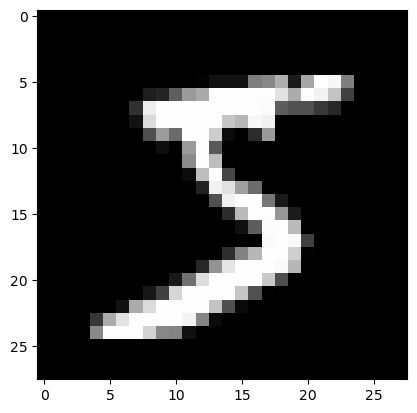

In [28]:
plt.imshow(image_tensor[0], cmap = 'gray')

In [ ]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
# Print the length of train and validation datasets
print("Length of Train Datasets: ", len(train_data))
print("Length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [ ]:
batch_size = 128
train_data_loader = DataLoader(train_data, batch_size, shuffle = True)
validation_data_loader = DataLoader(validation_data, batch_size, shuffle = False)

### What is nn.Linear?
Represented by the formula `y = xA^T + b`, where `x` is the input, `A` is the weight, `b` is the bias, and `y` is the output.

Parameters: `in_features` and `out_features`, which represent the number of input and output features.

`A` is randomly initialized weight matrix of size `out_features x in_features`.

`b` is randomly initialized of size `out_features x 1`.

In [ ]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# Logistic regression model
model = nn.Linear(in_features=input_size, out_features=num_classes)
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0309, -0.0010,  0.0019,  ...,  0.0216, -0.0119,  0.0211],
        [-0.0159,  0.0176, -0.0324,  ..., -0.0178, -0.0150,  0.0118],
        [ 0.0229, -0.0340,  0.0156,  ..., -0.0222, -0.0111, -0.0108],
        ...,
        [-0.0269, -0.0179,  0.0225,  ...,  0.0026, -0.0232,  0.0204],
        [-0.0114, -0.0117,  0.0181,  ..., -0.0206,  0.0193,  0.0288],
        [ 0.0146,  0.0198,  0.0348,  ...,  0.0325,  0.0184, -0.0003]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0182,  0.0044, -0.0202,  0.0096, -0.0127,  0.0007, -0.0355,  0.0303,
         0.0134, -0.0076], requires_grad=True)


In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([7, 1, 9, 4, 5, 1, 9, 3, 4, 4, 1, 1, 1, 3, 4, 1, 1, 9, 9, 0, 7, 8, 8, 2,
        1, 3, 3, 6, 7, 6, 8, 2, 6, 1, 6, 2, 1, 1, 4, 0, 5, 7, 1, 8, 5, 9, 7, 8,
        9, 6, 0, 4, 7, 7, 4, 3, 8, 7, 2, 2, 8, 6, 7, 2, 4, 6, 1, 9, 7, 2, 5, 5,
        9, 4, 3, 1, 7, 5, 3, 7, 4, 6, 3, 4, 0, 4, 9, 4, 2, 2, 2, 5, 3, 0, 6, 3,
        3, 6, 2, 5, 9, 6, 3, 6, 5, 2, 0, 2, 0, 4, 6, 2, 0, 9, 4, 9, 8, 8, 1, 3,
        7, 6, 9, 1, 4, 8, 2, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return(out)

model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0218,  0.0145,  0.0202,  ..., -0.0048,  0.0262, -0.0059],
         [-0.0060, -0.0294, -0.0209,  ..., -0.0352, -0.0336,  0.0228],
         [-0.0043,  0.0207, -0.0115,  ...,  0.0053, -0.0123,  0.0258],
         ...,
         [-0.0345, -0.0172, -0.0030,  ..., -0.0068, -0.0122, -0.0195],
         [ 0.0297,  0.0213, -0.0254,  ...,  0.0327, -0.0030, -0.0042],
         [-0.0258, -0.0227, -0.0244,  ...,  0.0087, -0.0064,  0.0053]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0045, -0.0264,  0.0212, -0.0165, -0.0287,  0.0285,  0.0279, -0.0162,
          0.0158,  0.0205], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[ 0.0232, -0.0620,  0.3258,  ..., -0.1480, -0.1405, -0.0597],
        [ 0.0524, -0.1108,  0.1317,  ...,  0.0046,  0.0529, -0.2438],
        [ 0.0376, -0.3335,  0.0774,  ..., -0.0108,  0.0681, -0.0923],
        ...,
        [ 0.0437, -0.0724, -0.0610,  ..., -0.2252,  0.1096,  0.2888],
        [ 0.2252, -0.0049,  0.2945,  ..., -0.4428, -0.2274, -0.1417],
        [-0.0734,  0.1218,  0.0845,  ..., -0.1930,  0.2174,  0.1501]],
       grad_fn=<AddmmBackward0>)
outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[ 0.0232, -0.0620,  0.3258,  0.1417, -0.2579,  0.6423,  0.1465, -0.1480,
         -0.1405, -0.0597],
        [ 0.0524, -0.1108,  0.1317,  0.3370, -0.2044,  0.5397, -0.2190,  0.0046,
          0.0529, -0.2438]])


In [ ]:
probs = F.softmax(outputs, dim = 1)

## checking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.0930, 0.0854, 0.1259, 0.1047, 0.0702, 0.1727, 0.1052, 0.0784, 0.0790,
         0.0856],
        [0.0988, 0.0839, 0.1069, 0.1313, 0.0764, 0.1608, 0.0753, 0.0942, 0.0988,
         0.0735]])


Sum:  0.9999998807907104


tensor([5, 5, 5, 3, 1, 5, 1, 5, 3, 3, 9, 5, 6, 3, 9, 5, 2, 5, 1, 3, 3, 0, 3, 5,
        3, 5, 5, 2, 5, 1, 5, 9, 5, 5, 9, 3, 3, 2, 8, 5, 5, 8, 8, 1, 5, 8, 5, 5,
        2, 7, 3, 5, 0, 9, 6, 1, 5, 2, 9, 5, 5, 3, 5, 5, 3, 3, 5, 3, 3, 2, 5, 9,
        3, 2, 9, 8, 5, 0, 9, 3, 5, 6, 5, 5, 3, 3, 5, 2, 5, 5, 5, 5, 2, 5, 5, 9,
        3, 9, 5, 8, 3, 0, 2, 2, 5, 5, 3, 3, 2, 1, 5, 2, 5, 8, 0, 1, 3, 3, 5, 3,
        5, 9, 9, 3, 3, 9, 2, 3])


tensor([0.1727, 0.1608, 0.1343, 0.1324, 0.1597, 0.1827, 0.1188, 0.1266, 0.1307,
        0.1285, 0.1166, 0.1443, 0.1242, 0.1258, 0.1179, 0.1182, 0.1441, 0.1346,
        0.1236, 0.1433, 0.1168, 0.1286, 0.1252, 0.1548, 0.1313, 0.1593, 0.1384,
        0.1358, 0.1599, 0.1260, 0.1408, 0.1191, 0.1262, 0.1107, 0.1269, 0.

In [ ]:
labels

tensor([8, 3, 2, 2, 1, 7, 7, 8, 7, 4, 5, 5, 2, 5, 5, 1, 5, 2, 5, 9, 2, 5, 4, 3,
        6, 7, 2, 8, 7, 7, 4, 3, 4, 8, 8, 4, 1, 7, 7, 1, 3, 1, 6, 1, 9, 8, 1, 5,
        2, 6, 7, 7, 3, 6, 8, 2, 5, 4, 0, 3, 6, 2, 0, 4, 9, 7, 6, 4, 4, 2, 4, 5,
        3, 1, 6, 6, 9, 0, 9, 5, 3, 7, 3, 5, 9, 2, 8, 9, 6, 6, 3, 3, 6, 6, 5, 9,
        2, 8, 3, 8, 7, 6, 7, 1, 1, 8, 3, 4, 1, 7, 3, 0, 5, 1, 3, 0, 5, 6, 3, 8,
        9, 1, 9, 2, 1, 9, 2, 7])

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ", accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.1641)


Loss Function:  <function cross_entropy at 0x7c566837a340>


tensor(2.2888, grad_fn=<NllLossBackward0>)


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    '''
      Modifying the input tenser (batch_size, 1, 28, 28) to match input_size dimension of (batch_size, 784) and return predicted outputs of (batch_size, 10)
      xb: batch of input images of shape (batch_size, 1, 28, 28)
      TODO: When this method is invoked?
    '''
    def forward(self, xb):
        '''
          xb.reshape(-1, 784)
          Passing -1: to keep the batch size same as input
          Passing 784: to flatten the image into a tenser of size (batch_size, 784)
        '''
        xb = xb.reshape(-1, 784)
        '''
          Passes the flattened input through the linear layer, producing a tensor of shape (batch_size, 10). Each row contains 10 scores (one for each digit).
        '''
        out = self.linear(xb)
        '''
          Return the output tensor
        '''
        return(out)

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return(loss)

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})

    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


model = MnistModel()

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [ ]:
result0 = evaluate(model, val_loader)
result0

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 1.1137, val_acc: 0.8105
Epoch [1], val_loss: 1.0404, val_acc: 0.8171
Epoch [2], val_loss: 0.9803, val_acc: 0.8235
Epoch [3], val_loss: 0.9303, val_acc: 0.8278
Epoch [4], val_loss: 0.8880, val_acc: 0.8313


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.8517, val_acc: 0.8348
Epoch [1], val_loss: 0.8202, val_acc: 0.8378
Epoch [2], val_loss: 0.7927, val_acc: 0.8412
Epoch [3], val_loss: 0.7683, val_acc: 0.8442
Epoch [4], val_loss: 0.7466, val_acc: 0.8457


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.7272, val_acc: 0.8481
Epoch [1], val_loss: 0.7096, val_acc: 0.8501
Epoch [2], val_loss: 0.6937, val_acc: 0.8520
Epoch [3], val_loss: 0.6791, val_acc: 0.8534
Epoch [4], val_loss: 0.6658, val_acc: 0.8543


Text(0.5, 1.0, 'Accuracy Vs. No. of epochs')

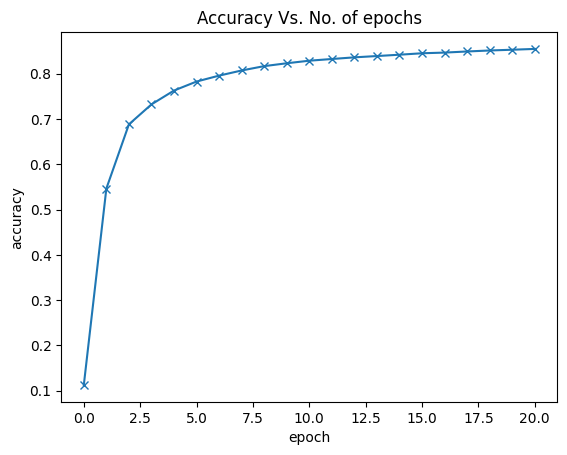

In [ ]:
## Replace these values with your result
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')


In [ ]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())


shape:  torch.Size([1, 28, 28])
Label:  7


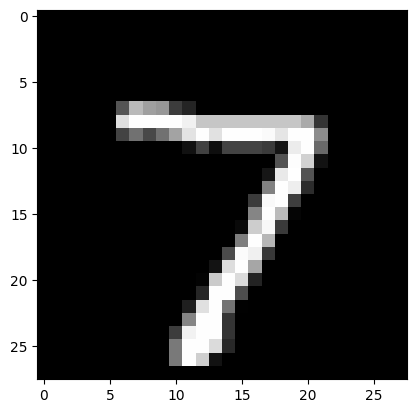

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("shape: ", img.shape)
print('Label: ', label)

In [ ]:
print(img.unsqueeze(0).shape)
print(img.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 28, 28])


In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

Label: 7 , Predicted : 7


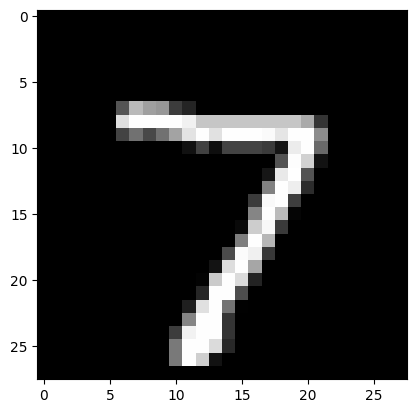

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted :', predict_image(img, model))

Label: 9 ,Predicted: 9


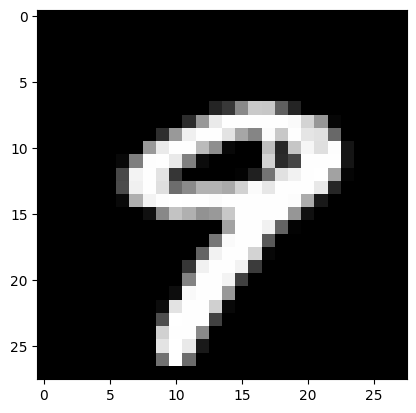

In [ ]:
img, label = test_dataset[9]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 0 ,Predicted: 0


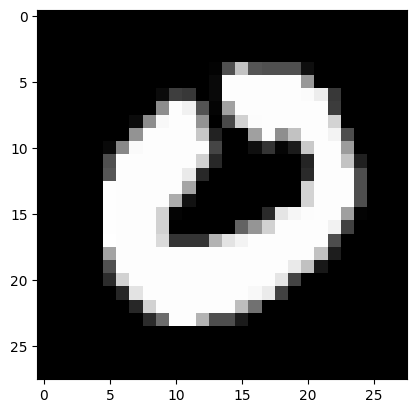

In [ ]:
img, label = test_dataset[25]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 3 ,Predicted: 3


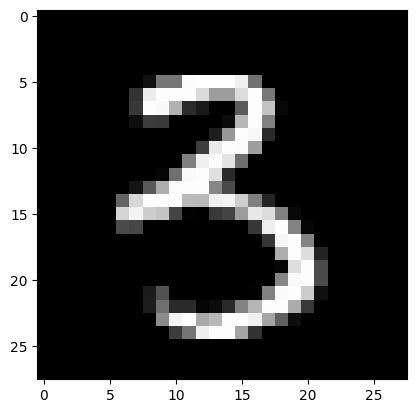

In [ ]:
img, label = test_dataset[5000]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6410156488418579, 'val_acc': 0.8612304925918579}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')


In [ ]:
model.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 0.0249,  0.0007,  0.0112,  ..., -0.0299,  0.0074, -0.0131],
                      [-0.0076,  0.0040,  0.0337,  ..., -0.0202, -0.0071, -0.0138],
                      [ 0.0357, -0.0276,  0.0064,  ...,  0.0269,  0.0256, -0.0223],
                      ...,
                      [-0.0045,  0.0109, -0.0172,  ..., -0.0053,  0.0325,  0.0290],
                      [ 0.0078, -0.0132,  0.0342,  ..., -0.0303,  0.0226, -0.0132],
                      [ 0.0199,  0.0237,  0.0350,  ..., -0.0077, -0.0186, -0.0156]])),
             ('linear.bias',
              tensor([-0.0432,  0.0914, -0.0325, -0.0148,  0.0245,  0.0723,  0.0217,  0.0339,
                      -0.1278,  0.0132]))])

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()


OrderedDict([('linear.weight',
              tensor([[ 0.0115,  0.0032, -0.0204,  ..., -0.0331, -0.0273,  0.0216],
                      [ 0.0343,  0.0014,  0.0320,  ...,  0.0107,  0.0164,  0.0324],
                      [-0.0109, -0.0186,  0.0150,  ..., -0.0065, -0.0329, -0.0074],
                      ...,
                      [ 0.0333, -0.0154, -0.0076,  ...,  0.0143,  0.0307, -0.0070],
                      [ 0.0276,  0.0241, -0.0305,  ..., -0.0318, -0.0133, -0.0347],
                      [-0.0215, -0.0116, -0.0075,  ...,  0.0116, -0.0302,  0.0345]])),
             ('linear.bias',
              tensor([-0.0584,  0.0609, -0.0568, -0.0315,  0.0427,  0.0564, -0.0101,  0.0679,
                      -0.0808,  0.0200]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.643792450428009, 'val_acc': 0.858691394329071}

Label: 3 ,Predicted: 3


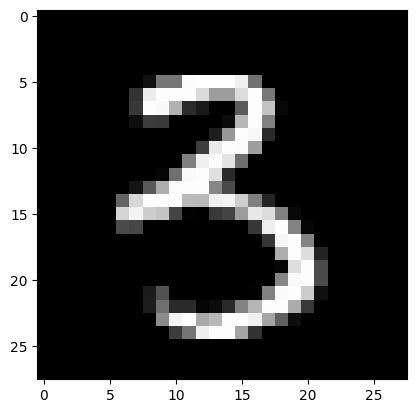

In [ ]:
img, label = test_dataset[5000]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model2))